In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

# Easy case: line through origin

In [2]:
v0 = np.array([1,1])

v = v0/np.linalg.norm(v0)
n = np.array([-v[1], v[0]])

mu, sigma = 0, 1 # mean and standard deviation
s = np.random.default_rng(42).normal(mu, sigma, size=(1000,2))

c = np.linspace(-3,3,1000)
vals = np.outer(c,v)
nals = np.outer(c,n)

d = np.abs(np.sum(s*n, axis=1))

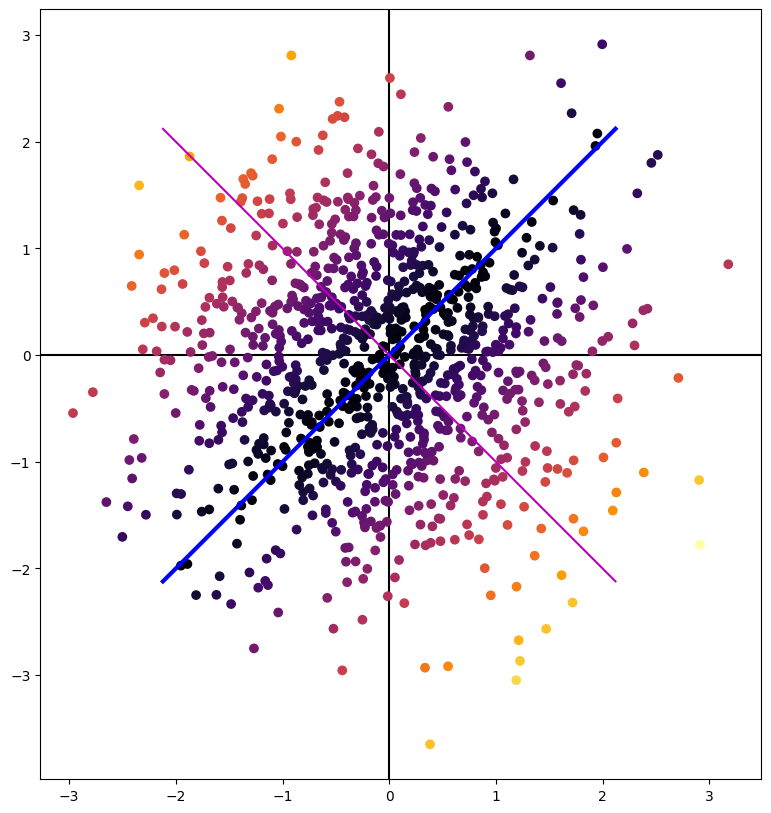

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.axhline(0, c='k', zorder=1)
ax.axvline(0, c='k', zorder=1)
ax.scatter(s[:,0], s[:,1], c=d, cmap='inferno', zorder=4)
ax.plot(vals[:,0], vals[:,1], color='blue', lw=3, zorder=5)
ax.plot(nals[:,0], nals[:,1], color='m', zorder=5)
ax.set_aspect('equal')
#ax.set_facecolor('k')

# Let's move the origin by `p`

In [5]:
p = np.array([5,2])
v0 = np.array([1,1])

v = v0/np.linalg.norm(v0)
n = np.array([-v[1], v[0]])

b = np.sum(p*n)

c = np.linspace(-5,5,1000)
vals = np.outer(c,v) + p
nals = np.outer(c,n) + p

d = np.abs(np.sum(s*n, axis=1) - b)

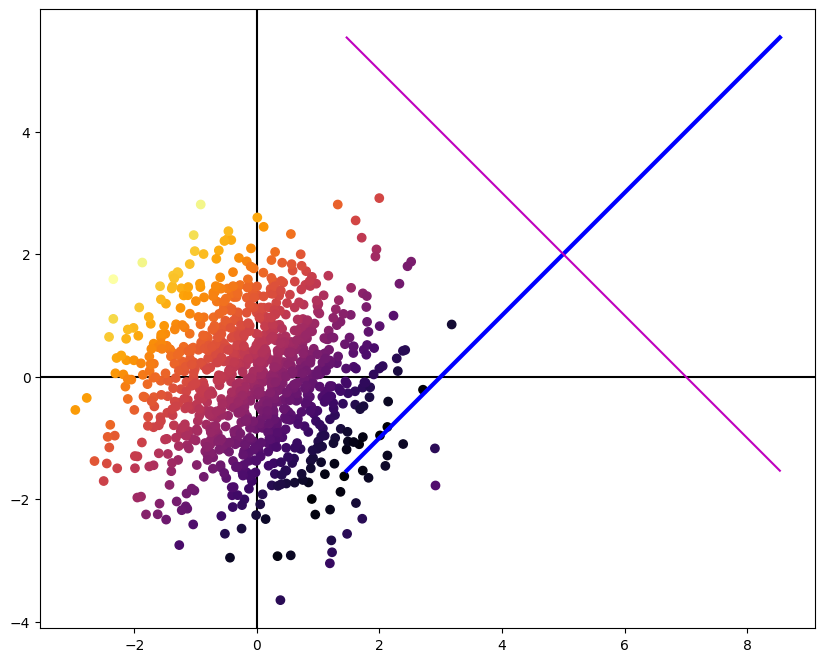

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.axhline(0, c='k', zorder=1)
ax.axvline(0, c='k', zorder=1)
ax.scatter(s[:,0], s[:,1], c=d, cmap='inferno', zorder=4)
ax.plot(vals[:,0], vals[:,1], color='blue', lw=3, zorder=5)
ax.plot(nals[:,0], nals[:,1], color='m', zorder=5)
ax.set_aspect('equal')
#ax.set_facecolor('k')

# Do angles

In [92]:
a1 = np.arccos(np.abs(np.sum((s*v)/(np.linalg.norm(s, axis=1).reshape(-1,1)), axis=1)))
a2 = np.arccos(np.sum((s*v)/(np.linalg.norm(s, axis=1).reshape(-1,1)), axis=1))

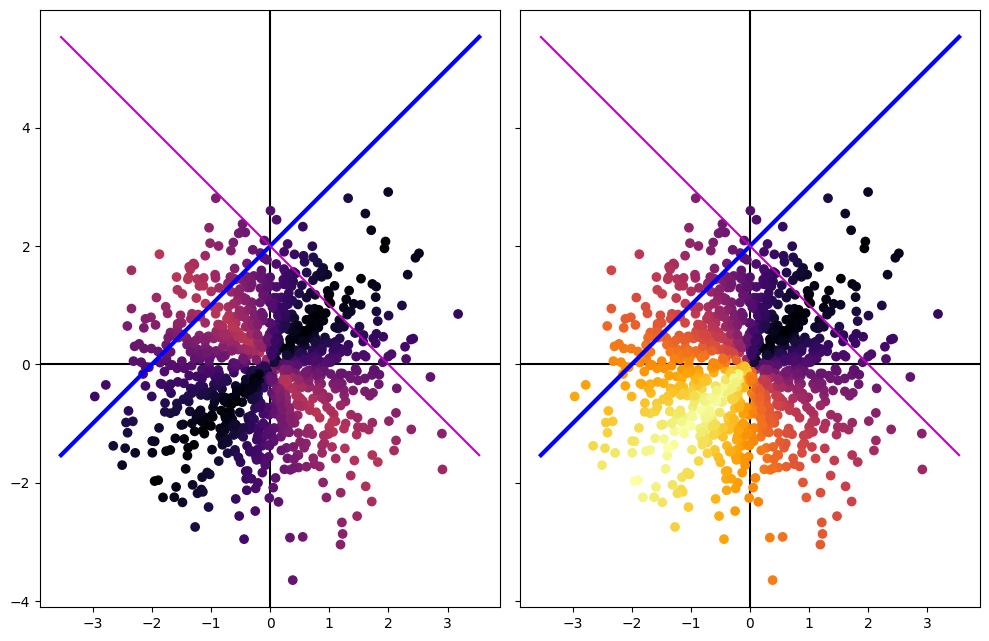

In [93]:
fig, ax = plt.subplots(1,2, figsize=(10,10), sharex=True, sharey=True)

for i in [0,1]:
    ax[i].axhline(0, c='k', zorder=1)
    ax[i].axvline(0, c='k', zorder=1)
    ax[i].plot(vals[:,0], vals[:,1], color='blue', lw=3, zorder=5)
    ax[i].plot(nals[:,0], nals[:,1], color='m', zorder=5)
    ax[i].set_aspect('equal')

ax[0].scatter(s[:,0], s[:,1], c=a1, cmap='inferno', zorder=4, vmin=0, vmax=np.pi)
ax[1].scatter(s[:,0], s[:,1], c=a2, cmap='inferno', zorder=4, vmin=0, vmax=np.pi)

fig.tight_layout();